1. What is Simple Linear Regression?

To establish a relationship between two/more variable.

- Y= mx+c

2. What are the key assumptions of Simple Linear Regression?

**Linearity**: The relationship between X and Y is linear.

**Independence**: Observations are independent of each other.

**Homoscedasticity**: Constant variance of residuals across all levels of X.

**Normality**: Residuals (errors) are normally distributed.

**No Multicollinearity**: (Applies to multiple regression) — predictors should not be highly correlated.

3. What is heteroscedasticity, and why is it important to address in regression models?

**Heteroscedasticity** occurs when the variance of residuals (errors) is not constant across all levels of the independent variable(s).

**Importance**:

It violates one of the main regression assumptions (homoscedasticity).

Leads to inefficient estimates and unreliable hypothesis tests.

May cause incorrect confidence intervals and p-values.

4. What is Multiple Linear Regression?

Multiple Linear Regression (MLR) models the relationship between one dependent variable and two or more independent variables.

-  Y=a+b1​X1​+b2​X2​+...+bn​Xn​

5. What is polynomial regression, and how does it differ from linear regression?

Polynomial Regression is a form of regression where the relationship between X and Y is modeled as an nth-degree polynomial.

- Y=a+b1​X+b2​X2+b3​X3+...+bn​Xn

**Difference**:

Linear Regression: Fits a straight line (Y changes linearly with X).

Polynomial Regression: Fits a curved line (captures non-linear patterns).

6.  Implement a Python program to fit a Simple Linear Regression model to the following sample data:

● X = [1, 2, 3, 4, 5]

● Y = [2.1, 4.3, 6.1, 7.9, 10.2]

Plot the regression line over the data points.

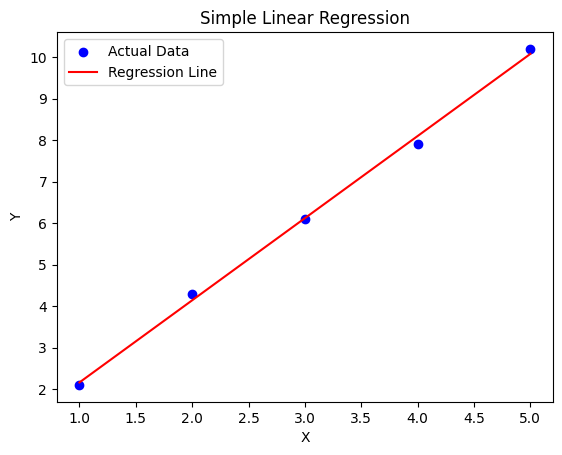

Intercept: 0.17999999999999794
Slope: 1.9800000000000004


In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Data
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
Y = np.array([2.1, 4.3, 6.1, 7.9, 10.2])

# Model
model = LinearRegression()
model.fit(X, Y)

# Predictions
Y_pred = model.predict(X)

# Plot
plt.scatter(X, Y, color='blue', label='Actual Data')
plt.plot(X, Y_pred, color='red', label='Regression Line')
plt.xlabel('X')
plt.ylabel('Y')
plt.title('Simple Linear Regression')
plt.legend()
plt.show()

print("Intercept:", model.intercept_)
print("Slope:", model.coef_[0])


7. Fit a Multiple Linear Regression model on this sample data:

● Area = [1200, 1500, 1800, 2000]

● Rooms = [2, 3, 3, 4]

● Price = [250000, 300000, 320000, 370000]

Check for multicollinearity using VIF and report the results.

In [3]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Data
data = pd.DataFrame({
    'Area': [1200, 1500, 1800, 2000],
    'Rooms': [2, 3, 3, 4],
    'Price': [250000, 300000, 320000, 370000]
})

X = data[['Area', 'Rooms']]
Y = data['Price']

# Model
model = LinearRegression()
model.fit(X, Y)

# VIF Calculation
vif_data = pd.DataFrame()
vif_data['Feature'] = X.columns
vif_data['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif_data)

  Feature         VIF
0    Area  127.796923
1   Rooms  127.796923


8. Implement polynomial regression on the following data:

● X = [1, 2, 3, 4, 5]

● Y = [2.2, 4.8, 7.5, 11.2, 14.7]

 Fit a 2nd-degree polynomial and plot the resulting curve.

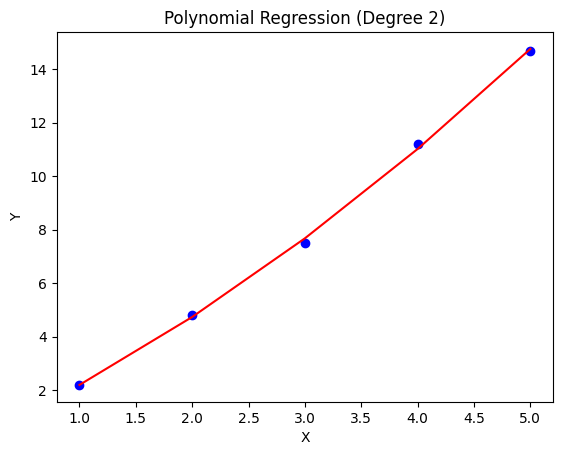

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

# Data
X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)
Y = np.array([2.2, 4.8, 7.5, 11.2, 14.7])

# Polynomial Transformation
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X)

# Fit Model
model = LinearRegression()
model.fit(X_poly, Y)

# Predict
Y_pred = model.predict(X_poly)

# Plot
plt.scatter(X, Y, color='blue')
plt.plot(X, Y_pred, color='red')
plt.title('Polynomial Regression (Degree 2)')
plt.xlabel('X')
plt.ylabel('Y')
plt.show()


9.  Create a residuals plot for a regression model trained on this data:

● X = [10, 20, 30, 40, 50]

● Y = [15, 35, 40, 50, 65]

Assess heteroscedasticity by examining the spread of residuals.

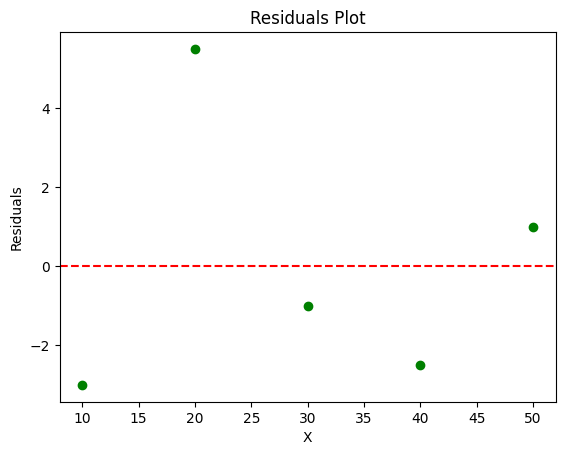

In [7]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Data
X = np.array([10, 20, 30, 40, 50]).reshape(-1, 1)
Y = np.array([15, 35, 40, 50, 65])

# Model
model = LinearRegression()
model.fit(X, Y)
Y_pred = model.predict(X)

# Residuals
residuals = Y - Y_pred

# Plot
plt.scatter(X, residuals, color='green')
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('X')
plt.ylabel('Residuals')
plt.title('Residuals Plot')
plt.show()


10. Imagine you are a data scientist working for a real estate company. You need to predict house prices using features like area, number of rooms, and location. However, you detect heteroscedasticity and multicollinearity in your regression model. Explain the steps you would take to address these issues and ensure a robust model.

**To handle Heteroscedasticity:**

Transform Variables: Apply log or square root transformation.

Weighted Least Squares: Give less weight to observations with higher variance.

Use Robust Standard Errors: Adjust standard errors to account for non-constant variance.

**To handle Multicollinearity:**

Remove Highly Correlated Predictors: Drop redundant features.

Use Regularization: Apply Ridge or Lasso regression.

Combine Variables: Create composite features (like total area = room * size).

Check VIF: Ensure all variables have VIF < 5.

These steps improve model accuracy, stability, and interpretability.